In [1]:
import pandas as pd
import numpy as np
from copernicus import CopernicusDEM

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 50)

In [3]:
path = 'D:\Simon\Documents\GP\Raw_Data\\test_df.csv'
#path = 'D:\Simon\Documents\GP\Raw_Data\selected_bird_species.csv'
path = 'D:\Simon\Documents\GP\Raw_Data\selected_bird_species_with_grids_50km.csv'
df = pd.read_csv(path, index_col=0)

In [4]:
df.head(3)

,Unnamed: 0,id_sighting,id_species,name_species,date,timing,coord_lat,coord_lon,precision,altitude,total_count,atlas_code,id_observer,country
0,0,29666944,119.0,Reiherente,2018-01-01,NaN,53.15776,8.676993,place,0,24.0,NaN,37718.0,de
1,1,29666945,141.0,Gänsesäger,2018-01-01,NaN,53.15776,8.676993,place,0,1.0,NaN,37718.0,de
2,2,29666946,24.0,Kormoran,2018-01-01,04:00,53.15776,8.676993,place,0,240.0,NaN,37718.0,de


### Add elevation features

In [5]:
copernicus = CopernicusDEM(raster_paths=['D:\Simon\Documents\GP\EU_DEM\eu_dem_v11_E40N20.TIF', 'D:\Simon\Documents\GP\EU_DEM\eu_dem_v11_E40N30.TIF'])
df = copernicus.get_elevation(df, lat_col='coord_lat', lon_col='coord_lon')

### Add weather features and merge with dataframe

In [6]:
from datetime import datetime
from meteostat import Point, Daily

import swifter
import dask.dataframe as dd

In [21]:
# swifter
def fetch_weather(row):
    location = Point(row.coord_lat, row.coord_lon, row.elevation)
    data = Daily(location, row.date, row.date).fetch()
    data.reset_index(drop=True, inplace=True)
    #print(row.name)
    return data

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df_weather = df.swifter.apply(fetch_weather, axis=1)
df_weather = pd.concat(df_weather.to_list(), ignore_index=True)

display(df_weather)

Pandas Apply:   0%|          | 0/10 [00:00<?, ?it/s]

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
1,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
2,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
3,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
4,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
5,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
6,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
7,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
8,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
9,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0


In [20]:
# iterrows
def fetch_weather(row):
    location = Point(row.coord_lat, row.coord_lon, row.elevation)
    data = Daily(location, row.date, row.date).fetch()
    data.reset_index(drop=True, inplace=True)
    return data

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df_weather = [fetch_weather(row) for _, row in df.iterrows()]
df_weather = pd.concat(df_weather, ignore_index=True)


display(df_weather)

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
1,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
2,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
3,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
4,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
5,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
6,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
7,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
8,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
9,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0


In [12]:
df = pd.merge(df, df_weather, left_index=True, right_index=True)

In [13]:
df.head()

,Unnamed: 0,id_sighting,id_species,name_species,date,timing,coord_lat,coord_lon,precision,altitude,total_count,atlas_code,id_observer,country,elevation,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,0,29666944,119.0,Reiherente,2018-01-01,NaN,53.15776,8.676993,place,0,24.0,NaN,37718.0,de,-1.05101,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
1,1,29666945,141.0,Gänsesäger,2018-01-01,NaN,53.15776,8.676993,place,0,1.0,NaN,37718.0,de,-1.05101,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
2,2,29666946,24.0,Kormoran,2018-01-01,04:00,53.15776,8.676993,place,0,240.0,NaN,37718.0,de,-1.05101,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
3,3,29666947,205.0,Blässhuhn,2018-01-01,NaN,53.15776,8.676993,place,0,13.0,NaN,37718.0,de,-1.05101,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0
4,4,29666948,310.0,Ringeltaube,2018-01-01,NaN,53.15776,8.676993,place,0,2.0,NaN,37718.0,de,-1.05101,6.5,3.2,9.2,1.5,0.0,212.0,24.8,68.4,997.2,174.0


### PCA with new weather features

Text(7, 0.75, 'strong correlation')

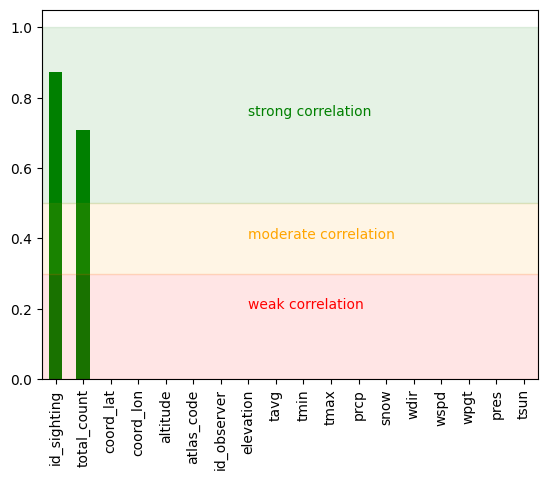

In [14]:
import matplotlib.pyplot as plt
df_for_pca = df.drop(columns=['name_species', 'timing', 'date', 'precision', 'country', 'Unnamed: 0'])
df_corr = df_for_pca.corr()['id_species'].abs().sort_values(ascending=False)
df_corr.drop('id_species', inplace=True)
ax = df_corr.plot.bar(color='green')

ax.axhspan(0, 0.3, alpha=0.1, color='red')
ax.axhspan(0.3, 0.5, alpha=0.1, color='orange')
ax.axhspan(0.5, 1, alpha=0.1, color='green')
ax.text(7,0.2, s='weak correlation', color='red')
ax.text(7,0.4, s='moderate correlation', color='orange')
ax.text(7,0.75, s='strong correlation', color='green')